# Router
- LLM이 특정 상황에서 다음에 실행할 노드를 결정하도록 함

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model =  'gpt-4.1')
def multiply(a:int, b:int):
    """Multiply a and b
    Args:
        a: first int
        b: second int
    """
    return a * b
llm_with_tools = llm.bind_tools([multiply])

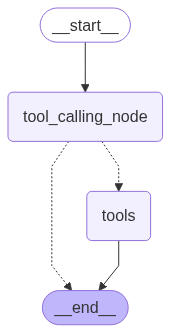

In [ ]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END, MessagesState
from langgraph.prebuilt import ToolNode, tools_condition
# Node 정의
def tool_calling_node(state: MessagesState):
    new_messages = [ llm_with_tools.invoke(state['messages'])]
    return {
        'messages': new_messages
    }
builder = StateGraph(MessagesState)
builder.add_node('tool_calling_node',tool_calling_node)
builder.add_node('tools',ToolNode([multiply]))

builder.add_edge(START, 'tool_calling_node')
builder.add_conditional_edges(
    'tool_calling_node',
    tools_condition
)
builder.add_edge('tools',END)
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [21]:
from pprint import pprint
from langchain_core.messages import HumanMessage
messages = [
    HumanMessage(content = '2랑 3이랑 곱하면?')
]
res = graph.invoke({'messages':messages})
pprint(res)

{'messages': [HumanMessage(content='2랑 3이랑 곱하면?', additional_kwargs={}, response_metadata={}, id='7de38296-2a0b-487a-a8a3-cb96557aef50'),
              AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_LfRs3tNtT2CrXMl2jSKd5NwG', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 69, 'total_tokens': 86, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_daf5fcc80a', 'id': 'chatcmpl-CDPxIRMd07fzG4hmxv3oPD1RtrzjL', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--97d2ecec-44a0-41e0-97a7-83986809e59e-0', tool_calls=[{'name': 'multiply', 'args': {'a': 2, 'b': 3}, 'id': 'call_LfRs3tNtT2CrXMl2jSKd

In [22]:
for m in res['messages']:
    m.pretty_print()

================================ Human Message =================================

2랑 3이랑 곱하면?
================================== Ai Message ==================================
Tool Calls:
  multiply (call_LfRs3tNtT2CrXMl2jSKd5NwG)
 Call ID: call_LfRs3tNtT2CrXMl2jSKd5NwG
  Args:
    a: 2
    b: 3
================================= Tool Message =================================
Name: multiply

6


In [11]:
from langchain_core.messages import AIMessage, HumanMessage
from pprint import pprint
messages=[
    HumanMessage(content = '배고파',name = 'name1'),
    AIMessage(content = '뭘 먹고 싶으세요?', name = 'LLM'),
    HumanMessage(content = '몰라', name = 'user1'),
]
for msg in messages:
    msg.pretty_print()

================================ Human Message =================================
Name: name1

배고파
================================== Ai Message ==================================
Name: LLM

뭘 먹고 싶으세요?
================================ Human Message =================================
Name: user1

몰라


In [5]:
from dotenv import load_dotenv
load_dotenv()
from langchain_openai import ChatOpenAI
llm  = ChatOpenAI(model = 'gpt-4.1-nano')
res = llm.invoke(messages)
res.content

'그럼 가볍게 간식이라도 드시거나, 맛있는 거 먹고 싶은 곳을 생각해보는 것도 좋을 것 같아요! 어떤 걸 먹고 싶은지 떠오르면 말해 주세요.'

In [19]:
# Tool Calling(커스텀 툴)

def multiply(a:int, b:int) -> int:
    '''Multiply a and b
    if there is no number, transform text to proper integer

    Args:
        a: first int
        b: second int
    '''
    return a * b
llm_with_tools = llm.bind_tools([multiply])

In [25]:
res = llm_with_tools.invoke([
    HumanMessage(content = '일 곱하기 이가 뭐야?',name = 'user1')
])
res.pretty_print()

================================== Ai Message ==================================
Tool Calls:
  multiply (call_u6hkQ1s4moQzwKVkekAWAzG9)
 Call ID: call_u6hkQ1s4moQzwKVkekAWAzG9
  Args:
    a: 1
    b: 2


# 메세지를 `State`로 사용하기

In [ ]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated 
from langgraph.graph.message import add_messages

class MessagesState(TypedDict):
    messages: Annotated[]


In [28]:
from dotenv import load_dotenv
from pprint import pprint
load_dotenv()

True

In [29]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model ='gpt-4.1')
def multiply(a: int, b: int):
    '''multiply a and b
    Args:
        a: first int
        b: second int
    '''
    return a * b
llm_with_tools = llm.bind_tools([multiply])

In [33]:
from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
from langchain.tools import tool
from langchain_openai import ChatOpenAI

@tool
def multiply(a:int, b:int) -> int:
    '''Multiply a and b

    Args:
        a: first int
        b: second int
    '''
    return a * b
@tool
def add(a:int, b:int) ->int:
    '''01_parsing.ipynb

In [31]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END, MessagesState
from langgraph.prebuilt import ToolNode, tools_condition

#Node 정의
def tool_calling_node(state:MessagesState):
    new_messages = [llm_with_tools.invoke(state['messages'])]
    return {
        'messages':new_messages
    }
# 그래프 빌드 
builder = StateGraph(MessagesState)
builder.add_node('tool_calling_node',tool_calling_node)
builder.add_node('tools',ToolNode[multiply])

TypeError: <class 'langgraph.prebuilt.tool_node.ToolNode'> is not a generic class